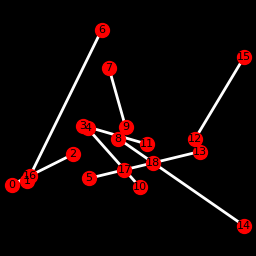

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from curve_creation import create_curves, create_nodes
from curve_drawing import draw_curves_and_nodes

size = 256              # Image size
n_control_points = 20   # "complexity" of the curves
max_vd =  0.            # Sets the typical curvature of the curves
num_curves = 8          # Number of curves to generate
extra_space = 16        # Extra space for curve endpoint position
radius = 2              # Radius of each curve
padding = 0             # Image padding

#np.random.seed(0)

curves = create_curves(size, n_control_points, max_vd, num_curves, extra_space, padding)
nodes = create_nodes(curves)

img = draw_curves_and_nodes(curves, nodes, curve_width=radius)

Image.fromarray(img)

### Tests

In [ ]:
img_curves = np.pad(img_curves, padding)

img_curves_blurred = gaussian_filter(img_curves.astype(float), sigma=sigma)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_curves, cmap='gray')
axs[1].imshow(img_curves_blurred, cmap='gray')

In [63]:
from skimage.morphology import skeletonize

from pyvane.image import Image
from pyvane.graph.creation import create_graph
from pyvane.graph import adjustment as net_adjust

length_threshold = 5

img_skel = skeletonize(img_curves)

graph = create_graph(Image(img_skel))
graph_simple = net_adjust.simplify(graph, False)
graph_final = net_adjust.adjust_graph(graph_simple, length_threshold, False, True)



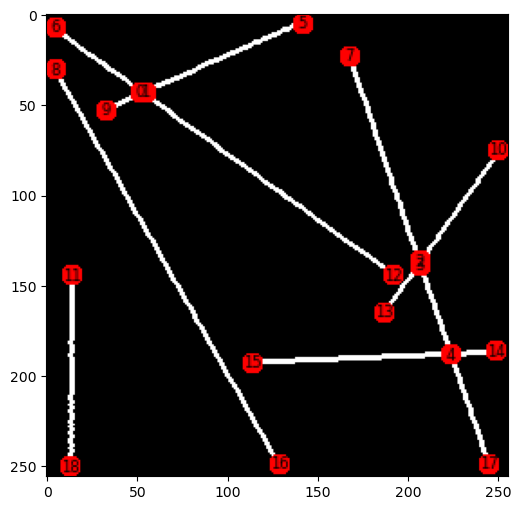

In [65]:
import numpy as np
from skimage import draw


def draw_nodes(graph, img, node_size=10, node_color=(255, 0, 0), text_size=12):

    # Make image RGB by copying the grayscale channel
    img = (255*img).astype(np.uint8)
    nodes_img = np.tile(img[..., None], 3)

    # Draw nodes
    for node, center in graph.nodes(data='center'):
        rr, cc = draw.disk(center, node_size, shape=img.shape)
        nodes_img[rr, cc] = node_color

    fig, ax = plt.subplots()
    fig.figimage(nodes_img, resize=True)

    for node, center in graph.nodes(data='center'):
        pos = (center[1]/img.shape[1], 1-(center[0]+1)/img.shape[0])
        fig.text(*pos, f"{node}", fontsize=text_size, va="center", ha="center")

    fig.canvas.draw()
    out_img = np.asarray(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)

    return out_img

img = draw_nodes(graph_final, img_curves, node_size=6, node_color=(255, 0, 0), text_size=6)

plt.figure(figsize=(6, 6))
plt.imshow(img)

In [84]:
len(graph_final)

29

In [52]:
ax

[]